# Multiclass Perceptron 

In this notebook, we'll try out the multiclass Perceptron and SVM on small data sets.

In [1]:
def evaluate_classifier(w,b,x):
    k = len(b)
    scores = np.zeros(k)
    for j in range(k):
        scores[j] = np.dot(w[j,:],x) + b[j]
    return int(np.argmax(scores))

In [2]:
def train_multiclass_perceptron(x,y,k,n_iters=100):
    n,d = x.shape
    w = np.zeros((k,d))
    b = np.zeros(k)
    done = False
    converged = True
    iters = 0
    #np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for j in I:
            pred_y = evaluate_classifier(w,b,x[j,:])
            true_y = int(y[j])
            if pred_y != true_y:
                w[true_y,:] = w[true_y,:] + x[j,:]
                b[true_y] = b[true_y] + 1.0
                w[pred_y,:] = w[pred_y,:] - x[j,:]
                b[pred_y] = b[pred_y] - 1.0
                done = False
        iters = iters + 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged

##  Experiments with multiclass Perceptron

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [4]:
def display_data_and_boundary(x,y,pred_fn):
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

In [5]:
def run_multiclass_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    k = int(max(y)) + 1
    print( "Number of classes: ", k)
    # Run the Perceptron algorithm for at most 1000 iterations
    w,b,converged = train_multiclass_perceptron(x,y,k,1000)
    # Show the data and boundary
    pred_fn = lambda p: evaluate_classifier(w,b,p)
    display_data_and_boundary(x,y,pred_fn)

Number of classes:  4
Perceptron algorithm: iterations until convergence:  25


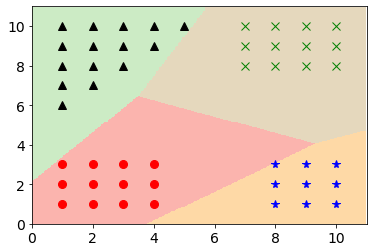

In [6]:
run_multiclass_perceptron('data_3.txt')

Number of classes:  3
Perceptron algorithm: iterations until convergence:  40


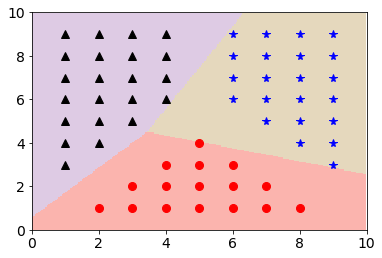

In [7]:
run_multiclass_perceptron('data_4.txt')